In [1]:
import pandas as pd
import os
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
sc.master

'local[*]'

In [5]:
import re 
from operator import add

In [42]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

df = spark.read.csv('/ca2/ProjectTweets.csv',header=True,inferSchema = True, sep="|")

print(df.collect())

IOPub data rate exceeded.                                                       
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# spark is from the previous example.
sc = spark.sparkContext

# A CSV dataset is pointed to by path.

path = "/ca2/ProjectTweets.csv"
TweetsDF = spark.read.csv(path)

In [45]:
TweetsDF.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [46]:
from pyspark.sql.types import *

In [48]:
pt = StructType([
    StructField("row", IntegerType(),True),
    StructField("id", IntegerType(),True),
    StructField("date", DateType(),True),
    StructField("query", StringType(),False),
    StructField("user", StringType(),True),
    StructField("text", StringType(),True) 
    
])
#schema = typ.StructType(pt)

In [50]:
protwe = spark.read.csv(path, schema = pt)
protwe.show()

+---+----------+----+--------+---------------+--------------------+
|row|        id|date|   query|           user|                text|
+---+----------+----+--------+---------------+--------------------+
|  0|1467810369|null|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|null|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|null|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|null|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|null|NO_QUERY|         Karoli|@nationwideclass ...|
|  5|1467811372|null|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  6|1467811592|null|NO_QUERY|        mybirch|         Need a hug |
|  7|1467811594|null|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  8|1467811795|null|NO_QUERY|2Hood4Hollywood|@Tatiana_K nope t...|
|  9|1467812025|null|NO_QUERY|        mimismo|@twittera que me ...|
| 10|1467812416|null|NO_QUERY| erinx3leannexo|spring break in p...|
| 11|1467812579|null|NO_QUERY|   pardonlauren|I 

In [34]:
# Creates a temporary view using the DataFrame
TweetsDF.createGlobalTempView("tweets")

2023-11-09 17:47:53,703 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-11-09 17:47:53,705 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-11-09 17:48:05,370 WARN metastore.ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
2023-11-09 17:48:05,376 WARN metastore.ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore hduser@127.0.1.1
2023-11-09 17:48:05,463 WARN metastore.ObjectStore: Failed to get database default, returning NoSuchObjectException
2023-11-09 17:48:07,591 WARN metastore.ObjectStore: Failed to get database global_temp, returning NoSuchObjectException


In [35]:
# SQL statements can be run by using the sql methods provided by spark
tweetsDF = spark.sql("SELECT _c0 as Row, _c1 as IDs, _c2 as Date, _c3 as Query, _c4 as User, _c5 as Tweet FROM tweets")
tweetsDF.show()

+---+----------+--------------------+--------+---------------+--------------------+
|Row|       IDs|                Date|   Query|           User|               Tweet|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|  5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|  7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nop

In [41]:
#df = spark.read.load("examples/src/main/resources/users.parquet")
#tweetsDF.select("Tweet").write.save("Tweet.csv")

In [36]:
userDF = spark.sql("SELECT _c4 as User FROM tweets")
userDF.show()

+---------------+
|           User|
+---------------+
|_TheSpecialOne_|
|  scotthamilton|
|       mattycus|
|        ElleCTF|
|         Karoli|
|       joy_wolf|
|        mybirch|
|           coZZ|
|2Hood4Hollywood|
|        mimismo|
| erinx3leannexo|
|   pardonlauren|
|           TLeC|
|robrobbierobert|
|    bayofwolves|
|     HairByJess|
| lovesongwriter|
|       armotley|
|     starkissed|
|      gi_gi_bee|
+---------------+
only showing top 20 rows



In [37]:
textDF = spark.sql("SELECT _c5 as Tweets FROM tweets")
textDF.show()

+--------------------+
|              Tweets|
+--------------------+
|@switchfoot http:...|
|is upset that he ...|
|@Kenichan I dived...|
|my whole body fee...|
|@nationwideclass ...|
|@Kwesidei not the...|
|         Need a hug |
|@LOLTrish hey  lo...|
|@Tatiana_K nope t...|
|@twittera que me ...|
|spring break in p...|
|I just re-pierced...|
|@caregiving I cou...|
|@octolinz16 It it...|
|@smarrison i woul...|
|@iamjazzyfizzle I...|
|Hollis' death sce...|
|about to file taxes |
|@LettyA ahh ive a...|
|@FakerPattyPattz ...|
+--------------------+
only showing top 20 rows



In [38]:
dateDF = spark.sql("SELECT _c2 as Dates FROM tweets")
dateDF.show()

+--------------------+
|               Dates|
+--------------------+
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
+--------------------+
only showing top 20 rows



In [17]:
#Looking for duplicates
print('Count of rows: {0}'.format(dateDF.count()))
print('Count of distinct rows: {0}'.format(dateDF.distinct().count()))

Count of rows: 1600000


Count of distinct rows: 774363


In [18]:
dateDF.dtypes

[('Dates', 'string')]

In [28]:
#dateDF = pd.to_datetime('dateDF').dt.date

In [33]:
dateDF.select("Dates").show()

+--------------------+
|               Dates|
+--------------------+
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:19:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
|Mon Apr 06 22:20:...|
+--------------------+
only showing top 20 rows



In [54]:
dateDF.write.format('csv').mode('Overwrite').option('path','output').save()

In [57]:
tweet = sc.textFile('/ca2/ProjectTweets.csv')
header = tweet.first()

tweet = tweet \
    .filter(lambda row: row != header) \
    .map(lambda row: [int(elem) for elem in row.split(',')])

In [58]:
tweets_df = spark.read.format('csv') \
.schema(pt) \
.load(path)

In [59]:
display (tweets_df)

DataFrame[row: int, id: int, date: date, query: string, user: string, text: string]

In [60]:
data_df = spark.createDataFrame(tweet,pt)

In [91]:
data_df.printSchema()

root
 |-- row: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



In [60]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [61]:
# Import as Dataframe
T = pd.read_csv('tweets.csv')
T.head()

,Row,Ids,Dates,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [52]:
T.dtypes

Row       int64
Ids       int64
Dates    object
Query    object
User     object
Tweet    object
dtype: object

In [53]:
# convert to datetime using pd.to_datetime
T['Dates'] = pd.to_datetime(T['Dates'])

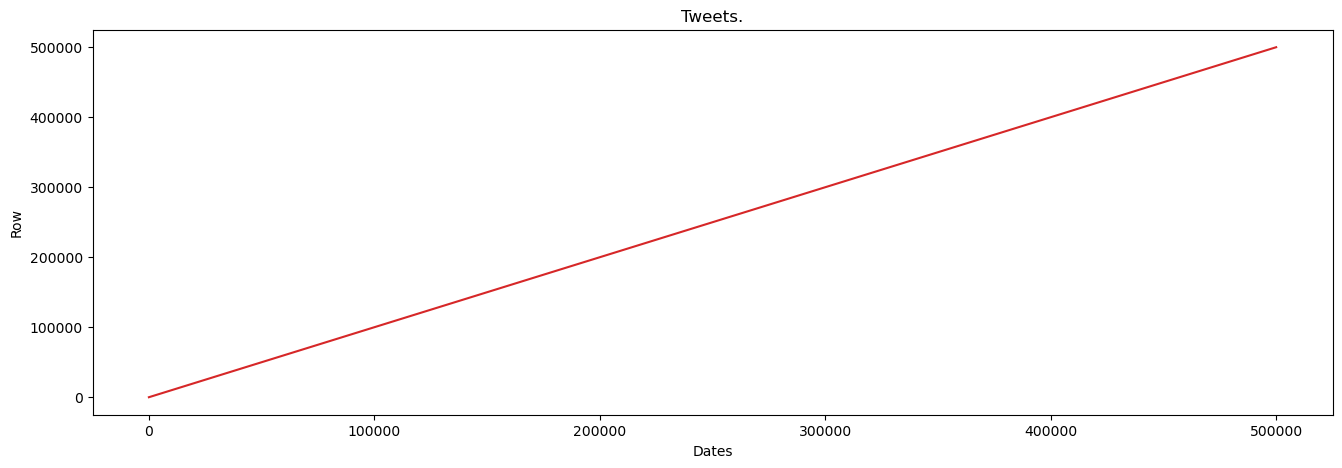

In [54]:
# Time series data 
import matplotlib.pyplot as plt

# Draw Plot
def plot_T(T, x, y, title="Tweets", xlabel='Dates', ylabel='Row', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_T(T, x=T.index, y=T['Row'], title='Tweets.')    

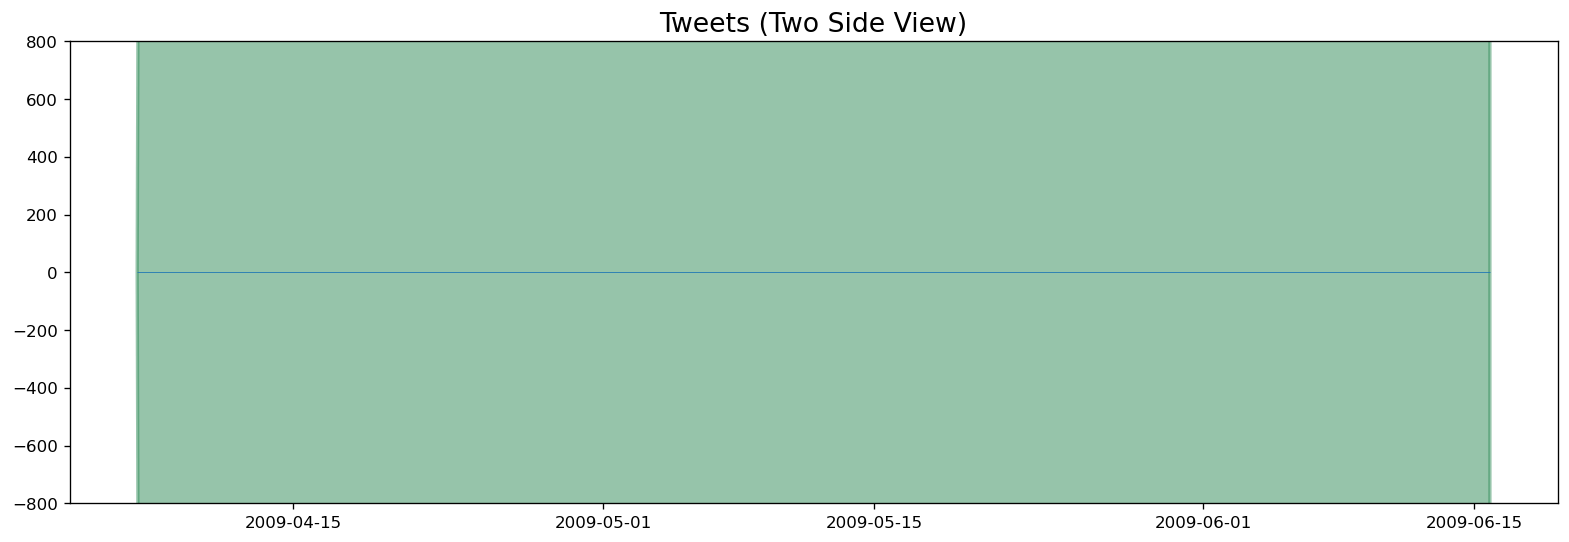

In [55]:
# Plot
x = T['Dates'].values
y1 = T['Row'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Tweets (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(T.Dates), xmax=np.max(T.Dates), linewidth=.5)
plt.show()

In [64]:
# Import Data
T = pd.read_csv('tweets.csv', parse_dates=['Dates'], index_col='Dates')
T.reset_index(inplace=True)

In [44]:
#pip install statsmodels

In [45]:
#pip install pandas-datareader

In [62]:
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [79]:
T = pd.read_csv('tweets.csv')
T.head(5)

,Row,Ids,Dates,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [80]:
T.index = pd.to_datetime(T['Dates'], format='mixed')
del T['Dates']

T.index = pd.to_datetime(T['Dates'], format ='mixed' )

KeyError: 'Dates'

In [71]:
T.index = pd.to_datetime(T['Dates'], format='%Y-%m-%d')

In [72]:
train = T[T.index < pd.to_datetime("2009-04-01", format='%Y-%m-%d')]
test = T[T.index >= pd.to_datetime("2009-04-01", format='%Y-%m-%d')]

In [73]:
y = train['Dates']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_T = y_pred.conf_int(alpha = 0.05) 
y_pred_T["Predictions"] = ARMAmodel.predict(start = y_pred_T.index[0], 
                                             end = y_pred_T.index[-1])
y_pred_T.index = test.index
y_pred_outARMA = y_pred_T["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Tweets')
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.title("Train/Test split for Tweets Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

TypeError: ufunc 'square' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''